In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

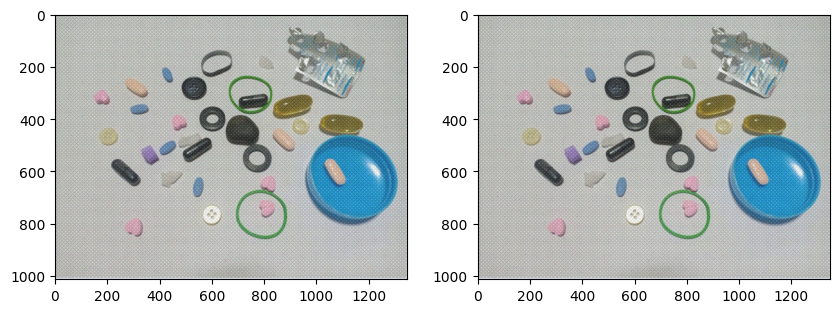

In [10]:
ori_img = cv.imread("medicine_with_noise_mid.jpg")
img = cv.cvtColor(ori_img, cv.COLOR_BGR2RGB)

fig=plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img)

plt.subplot(222)
plt.imshow(img)